In [1]:
import pandas as pd
url = "https://drive.google.com/file/d/1FYhN_2AzTBFuWcfHaRuKcuCE6CWXsWtG/view?usp=sharing" # orderlines.csv
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
df_orderlines = pd.read_csv(path)
url = "https://drive.google.com/file/d/1afxwDXfl-7cQ_qLwyDitfcCx3u7WMvkU/view?usp=drive_link" # products.csv
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
df_products = pd.read_csv(path)
url = "https://drive.google.com/file/d/1Vu0q91qZw6lqhIqbjoXYvYAQTmVHh6uZ/view?usp=drive_link" # orders.csv
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
df_orders = pd.read_csv(path)
url = "https://drive.google.com/file/d/1m1ThDDIYRTTii-rqM5SEQjJ8McidJskD/view?usp=drive_link" # brands.csv
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
df_brands = pd.read_csv(path)

In [ ]:
import pandas as pd

def load_gdrive_csv(url):
    file_id = url.split("/")[-2]
    path = f"https://drive.google.com/uc?export=download&id={file_id}"
    return pd.read_csv(path)

df_orderlines = load_gdrive_csv("https://drive.google.com/file/d/1FYhN_2AzTBFuWcfHaRuKcuCE6CWXsWtG/view?usp=sharing")
df_products = load_gdrive_csv("https://drive.google.com/file/d/1afxwDXfl-7cQ_qLwyDitfcCx3u7WMvkU/view?usp=drive_link")
df_orders = load_gdrive_csv("https://drive.google.com/file/d/1Vu0q91qZw6lqhIqbjoXYvYAQTmVHh6uZ/view?usp=drive_link")
df_brands = load_gdrive_csv("https://drive.google.com/file/d/1m1ThDDIYRTTii-rqM5SEQjJ8McidJskD/view?usp=drive_link")
# Check basic info and first few rows
print("Orderlines:")
print(df_orderlines.info())
print(df_orderlines.head(), "\n")

print("Products:")
print(df_products.info())
print(df_products.head(), "\n")

print("Orders:")
print(df_orders.info())
print(df_orders.head(), "\n")

print("Brands:")
print(df_brands.info())
print(df_brands.head())


Orderlines:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293983 entries, 0 to 293982
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                293983 non-null  int64 
 1   id_order          293983 non-null  int64 
 2   product_id        293983 non-null  int64 
 3   product_quantity  293983 non-null  int64 
 4   sku               293983 non-null  object
 5   unit_price        293983 non-null  object
 6   date              293983 non-null  object
dtypes: int64(4), object(3)
memory usage: 15.7+ MB
None
        id  id_order  product_id  product_quantity      sku unit_price  \
0  1119109    299539           0                 1  OTT0133      18.99   
1  1119110    299540           0                 1  LGE0043     399.00   
2  1119111    299541           0                 1  PAR0071     474.05   
3  1119112    299542           0                 1  WDT0315      68.39   
4  1119113    299543         

1. What is the time period that the dataset covers?

In [ ]:
import pandas as pd

# Convert 'created_date' to datetime
df_orders['created_date'] = pd.to_datetime(df_orders['created_date'])

# Use agg to get both min and max at once
time_period = df_orders['created_date'].agg(['min', 'max'])

print(time_period)


min   2017-01-01 00:07:19
max   2018-03-14 13:58:36
Name: created_date, dtype: datetime64[ns]


2 What is the overall revenue for that time? and explain

In [ ]:
df_orderlines.head()

,id,id_order,product_id,product_quantity,sku,unit_price,date,revenue
0,1119109,299539,0,1,OTT0133,18.99,2017-01-01 00:07:19,18.99
1,1119110,299540,0,1,LGE0043,399.00,2017-01-01 00:19:45,399.00
2,1119111,299541,0,1,PAR0071,474.05,2017-01-01 00:20:57,474.05
3,1119112,299542,0,1,WDT0315,68.39,2017-01-01 00:51:40,68.39
4,1119113,299543,0,1,JBL0104,23.74,2017-01-01 01:06:38,23.74


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293983 entries, 0 to 293982
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                293983 non-null  int64 
 1   id_order          293983 non-null  int64 
 2   product_id        293983 non-null  int64 
 3   product_quantity  293983 non-null  int64 
 4   sku               293983 non-null  object
 5   unit_price        293983 non-null  object
 6   date              293983 non-null  object
 7   revenue           293983 non-null  object
dtypes: int64(4), object(4)
memory usage: 17.9+ MB


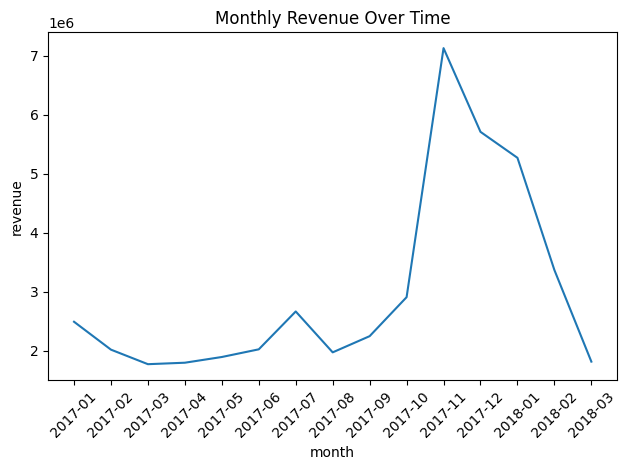

In [ ]:
df_orderlines.info()
# Ensure 'created_date' in df_orders is datetime
df_orders['created_date'] = pd.to_datetime(df_orders['created_date'])

# Convert 'unit_price' to numeric, coercing errors, before calculating revenue
df_orderlines['unit_price'] = pd.to_numeric(df_orderlines['unit_price'], errors='coerce')
df_orderlines['revenue'] = df_orderlines['product_quantity'] * df_orderlines['unit_price']

# Merge orders with orderlines using the correct keys
df_merged = df_orderlines.merge(df_orders[['order_id','created_date']], left_on='id_order', right_on='order_id')

# Extract month-year
df_merged['month'] = df_merged['created_date'].dt.to_period('M')

# Monthly revenue - ensure revenue is numeric before summing
monthly_revenue = df_merged.groupby('month')['revenue'].sum().reset_index()

# Optional: visualize
import seaborn as sns
import matplotlib.pyplot as plt

# Convert month to string for plotting to avoid issues with PeriodDtype
monthly_revenue['month'] = monthly_revenue['month'].astype(str)

sns.lineplot(data=monthly_revenue, x='month', y='revenue')
plt.xticks(rotation=45)
plt.title("Monthly Revenue Over Time")
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()

3.Are there seasonal patterns in the evolution of sales?

In [12]:
import pandas as pd

# Convert 'unit_price' to numeric, coercing errors, before calculating revenue
df_orderlines['unit_price'] = pd.to_numeric(df_orderlines['unit_price'], errors='coerce')
df_orderlines['revenue'] = df_orderlines['product_quantity'] * df_orderlines['unit_price']

# Merge orders with orderlines using the correct keys
df_merged = df_orderlines.merge(df_orders[['order_id','created_date']], left_on='id_order', right_on='order_id')

# Grouping by month and year to show monthly revenue trends
df_merged['YearMonth'] = df_merged['created_date'].dt.to_period('M')
monthly_sales = df_merged.groupby('YearMonth')['revenue'].sum().reset_index()
monthly_sales['YearMonth'] = monthly_sales['YearMonth'].astype(str)

print("--- Monthly Revenue ---")
print(monthly_sales)

--- Monthly Revenue ---
   YearMonth     revenue
0    2017-01  2489310.52
1    2017-02  2016343.71
2    2017-03  1770175.82
3    2017-04  1795081.69
4    2017-05  1891964.74
5    2017-06  2021962.33
6    2017-07  2663660.57
7    2017-08  1970772.44
8    2017-09  2245095.91
9    2017-10  2905777.34
10   2017-11  7126519.76
11   2017-12  5707628.46
12   2018-01  5267578.86
13   2018-02  3365423.72
14   2018-03  1813455.02


4.What are the most sold products?

In [14]:
# Merge orderlines and products to get product names
df_merged_products = df_orderlines.merge(df_products[['sku', 'name']], on='sku', how='left')

# Group by product name and sum the product quantity
product_volume = df_merged_products.groupby('name')['product_quantity'].sum().reset_index()

# Sort by product quantity in descending order
product_volume = product_volume.sort_values(by='product_quantity', ascending=False)

print("--- 4. Top 10 Most Sold Products (by Volume) ---")
print(product_volume.head(10).to_markdown(index=False))
print("\n")

--- 4. Top 10 Most Sold Products (by Volume) ---
| name                                                                                     |   product_quantity |
|:-----------------------------------------------------------------------------------------|-------------------:|
| IPhone AppleCare Protection Plan                                                         |               6366 |
| Office 365 Personal 1 license 1 M ± or                                                   |               6316 |
| Apple Magic Trackpad 2                                                                   |               5648 |
| IMac AppleCare Protection Plan                                                           |               5487 |
| AppleCare Protection Plan MacBook / Air / Pro 13 "                                       |               4164 |
| Apple iMac 27 "Core i5 3.3GHz Retina 5K | 8GB | 2TB Fusion                               |               3534 |
| Apple iMac 27 "Core i5 3.2GHz Retina 

In [16]:
# Grouping by product and summing the revenue generated
product_revenue = df_merged_products.groupby('name')['revenue'].sum().reset_index()
product_revenue = product_revenue.sort_values(by='revenue', ascending=False)
print("--- 5. Top 10 Products by Total Revenue Generated ---")
print(product_revenue.head(10).to_markdown(index=False))
print("\n")

--- 5. Top 10 Products by Total Revenue Generated ---
| name                                                      |   revenue |
|:----------------------------------------------------------|----------:|
| Apple MacBook Air 13 "Core i5 18GHz | 8GB RAM | 128GB SSD |    984868 |
| AppleCare Protection Plan MacBook / Air / Pro 13 "        |    859266 |
| IMac AppleCare Protection Plan                            |    810449 |
| Apple iPhone 8 Plus 64GB Gold                             |    802392 |
| Apple Magic Trackpad 2                                    |    736835 |
| Apple iPhone 64GB Space Gray 8                            |    600556 |
| Apple iPhone 8 Plus 64GB Space Gray                       |    563528 |
| Apple iPhone 32GB Space Gray                              |    435554 |
| Office 365 Personal 1 license 1 M ± or                    |    423168 |
| AppleCare Protection MacBook Pro 15                       |    402963 |


